In [1]:
#Adds higher directory to path to access /ATS
import sys
sys.path.append("../")

from ATS.general import *
from ATS.QAQC import *
import numpy as np
import pandas as pd

# Set the DataFram in pandas to show all columns and 1000 rows. Display plots inline
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 1000)

2021-12-19 16:40:24.256666: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-19 16:40:24.256710: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
service_id = 'ee4bea79079c42a5ba3be2f5ae96e364'

# Load, Merge, and Subset Data

<Item title:"SAC_Upland_Hydrology_Assessment_RT" type:Feature Layer Collection owner:Anooshi>
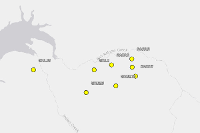

In [3]:
# Load data from arcGIS online
output = arcGIS_data_load(service_id)

stations = output['data0']
observations = output['table0']
feature_service = output['feature_service']

In [4]:
# Merge related table and feature layer
data = stations.merge(observations, left_on='GlobalID', right_on='Ref_to_Stations', how='inner')
data = data.drop(columns=['GlobalID_x','OBJECTID_x','Ref_to_Stations'])
data = data.rename(columns={'GlobalID_y':'GlobalID', 'OBJECTID_y':'OBJECTID'})
data

,Plot_Numbe,Habitat_Ty,Slope,BHRSite,SHAPE,OBJECTID,Surveyor_1,Surveyor_2,Dom_Speci_1,Dom_Speci_2,Comments,GlobalID,Inf_Rate_1,Pct_Cover,Bare_Ground,Bulk_Density,Inf_Rate_2,Soil,Water_Content,Soil_Porosity,Soil_Pore_Space,Volumetric_Water,Soil_Wet,Soil_Dry,Infil_Time_1,Infl_Time_2,Observation_Date
0,SAC2.5,Non-native grassland -enhancement,3-12%,SAC,"{'x': 6188445.535607055, 'y': 2037651.67534165...",1,Jackson Sabol,Roger Stephens,Bromus hordeaceus,Annual grass (Unidentifiable),Rebar and stake missing. Heavy cattle disturba...,4da536b7-e171-4ee7-b430-7ee79700c76d,0.020,99,1.0,1.303,0.000,PgB,0.238,0.508,61.02,0.310,576.0,465.270,53.00,0.000,2018-03-29 01:41:54.000
1,SAC2.5,Non-native grassland -enhancement,3-12%,SAC,"{'x': 6188445.535607055, 'y': 2037651.67534165...",12,Jackson Sabol,Rusty Hutto,Bromus hordeaceus,Festuca perennis,Rebar and stake missing. High cattle disturban...,4bdf26a2-965c-48c0-8bb4-f0dd57977bf4,0.030,99,1.0,0.000,0.000,PgB,0.000,0.000,0.00,0.000,0.0,0.000,30.90,0.000,2018-06-07 00:03:13.000
2,SAC2.5,Non-native grassland -enhancement,3-12%,SAC,"{'x': 6188445.535607055, 'y': 2037651.67534165...",15,Rusty Hutto,Roger Stephens,Bromus hordeaceus,Festuca perennis,Rebar and stake missing. High cattle disturban...,a57fb91d-6ba3-451a-bb04-ea08bb5bea0c,0.235,99,1.0,0.000,0.040,PgB,0.000,0.000,0.00,0.000,0.0,0.000,4.25,27.620,2018-06-07 00:03:13.000
3,SAC2.5,Non-native grassland -enhancement,3-12%,SAC,"{'x': 6188445.535607055, 'y': 2037651.67534165...",24,Janel Mayo,Jackson Sabol,Bromus hordeaceus,Festuca perennis,Cattle trail runs south of point. Carsonite po...,6a154c20-9c72-4efc-af66-7301b041b108,0.000,95,5.0,0.000,0.000,PgB,0.000,0.000,0.00,0.000,0.0,0.000,0.00,0.000,2019-05-09 01:53:03.000
4,SAC2.5,Non-native grassland -enhancement,3-12%,SAC,"{'x': 6188445.535607055, 'y': 2037651.67534165...",28,Ryan Swanson,None,Festuca perennis,Bromus hordeaceus,Cattle trail runs right through point. Carsoni...,e6ed072e-7e1b-44e4-8908-a8ec1c7a3430,0.000,99,1.0,0.000,0.000,PgB,0.000,0.000,0.00,0.000,0.0,0.000,0.00,0.000,2019-08-23 00:07:40.000
5,SAC2.5,Non-native grassland -enhancement,3-12%,SAC,"{'x': 6188445.535607055, 'y': 2037651.67534165...",38,Roger Stephens,Brian Creeks,Bromus hordeaceus,Festuca perennis,High cattle disturbance area; trails running n...,015f52d4-5c8e-46d0-b081-fa3cd2f73009,0.230,100,0.0,0.000,0.040,PgB,0.000,0.000,0.00,0.000,0.0,0.000,4.30,27.620,2019-11-02 02:49:13.000
6,SAC2.5,Non-native grassland -enhancement,3-12%,SAC,"{'x': 6188445.535607055, 'y': 2037651.67534165...",43,Kevin Sherrill,Darian Wong,Bromus hordeaceus,Festuca perennis,Quadrat was moved 8 feet north of Carsonite po...,3e992df4-c36f-4c07-8d5d-08b0ec10d371,0.000,98,2.0,0.000,0.000,PgB,0.000,0.000,0.00,0.000,0.0,0.000,0.00,0.000,2020-06-23 16:53:10.000
7,SAC2.5,Non-native grassland -enhancement,3-12%,SAC,"{'x': 6188445.535607055, 'y': 2037651.67534165...",46,Silas Ellison,Roger Stephens,Annual grass (Unidentifiable),Bromus hordeaceus,Quadrat moved from original location (see prev...,e2136817-196e-4310-89c2-a119b16c65fc,1.470,95,5.0,0.000,0.023,PgB,0.000,0.000,0.00,0.000,0.0,0.000,0.68,42.650,2020-11-17 18:49:15.000
8,SAC2.5,Non-native grassland -enhancement,3-12%,SAC,"{'x': 6188445.535607055, 'y': 2037651.67534165...",52,Brian Creeks,Kurt Lutz,Avena sp.,Hordeum marinum ssp. gussoneanum,Quadrat previously moved from original locatio...,38a1886f-f9e3-40ec-a7c0-fab6e2679a69,0.360,90,10.0,0.000,0.350,PgB,0.000,0.000,0.00,0.000,0.0,0.000,2.75,28.750,2021-05-24 20:38:54.000
9,SAC2.5,Non-native grassland -enhancement,3-12%,SAC,"{'x': 6188445.535607055, 'y': 2037651.67534165...",62,Roger Stephens,Kurt Lutz,Bromus diandrus,Hirschfeldia incana,Moved 10 feet north of carsonite as per previo...,bf908e58-c107-4fa5-aae8-f81391620488,0.230,70,30.0,0.000,0.020,PgB,0.000,0.000,0.00,0.000,0.0,0.000,4.42,60.020,2021-08-24 20:40:09.000


In [5]:
# Subset data for desired year.
sYear = input("Start Year? (YYYY)")
sub = year_subset(data,sYear)
sub.head()

Start Year? (YYYY) 2020

Analysis for 2020-10-01 07:00 UTC to 2021-10-01 07:00 UTC
Entries in Subset: 18


,Plot_Numbe,Habitat_Ty,Slope,BHRSite,SHAPE,OBJECTID,Surveyor_1,Surveyor_2,Dom_Speci_1,Dom_Speci_2,Comments,GlobalID,Inf_Rate_1,Pct_Cover,Bare_Ground,Bulk_Density,Inf_Rate_2,Soil,Water_Content,Soil_Porosity,Soil_Pore_Space,Volumetric_Water,Soil_Wet,Soil_Dry,Infil_Time_1,Infl_Time_2,Observation_Date
7,SAC2.5,Non-native grassland -enhancement,3-12%,SAC,"{'x': 6188445.535607055, 'y': 2037651.67534165...",46,Silas Ellison,Roger Stephens,Annual grass (Unidentifiable),Bromus hordeaceus,Quadrat moved from original location (see prev...,e2136817-196e-4310-89c2-a119b16c65fc,1.47,95,5,0.0,0.023,PgB,0.0,0.0,0.0,0.0,0.0,0.0,0.68,42.650,2020-11-17 18:49:15
8,SAC2.5,Non-native grassland -enhancement,3-12%,SAC,"{'x': 6188445.535607055, 'y': 2037651.67534165...",52,Brian Creeks,Kurt Lutz,Avena sp.,Hordeum marinum ssp. gussoneanum,Quadrat previously moved from original locatio...,38a1886f-f9e3-40ec-a7c0-fab6e2679a69,0.36,90,10,0.0,0.350,PgB,0.0,0.0,0.0,0.0,0.0,0.0,2.75,28.750,2021-05-24 20:38:54
9,SAC2.5,Non-native grassland -enhancement,3-12%,SAC,"{'x': 6188445.535607055, 'y': 2037651.67534165...",62,Roger Stephens,Kurt Lutz,Bromus diandrus,Hirschfeldia incana,Moved 10 feet north of carsonite as per previo...,bf908e58-c107-4fa5-aae8-f81391620488,0.23,70,30,0.0,0.020,PgB,0.0,0.0,0.0,0.0,0.0,0.0,4.42,60.020,2021-08-24 20:40:09
17,SA1.9,Oak Savannah -establish/reestablish,0-4%,SAC,"{'x': 6185615.444810554, 'y': 2036868.80715672...",48,Roger Stephens,Kurt Lutz,Bromus diandrus,Avena sp.,No cattle impact area. Some gopher activity ar...,a197aca1-af3b-4034-ae0d-99ce5679df8c,0.44,98,2,0.0,0.050,Za,0.0,0.0,0.0,0.0,0.0,0.0,2.25,20.120,2020-11-17 20:48:08
18,SA1.9,Oak Savannah -establish/reestablish,0-4%,SAC,"{'x': 6185615.444810554, 'y': 2036868.80715672...",56,Brian Creeks,Kurt Lutz,Bromus diandrus,Avena sp.,No cattle impact area inside planted area fenc...,9a8f93b1-5ad8-489e-a121-97836377d27c,1.67,99,1,0.0,0.090,Za,0.0,0.0,0.0,0.0,0.0,0.0,0.60,10.533,2021-05-27 19:43:10


# QAQC

In [53]:
validate_domains(feature_service)



Table/Layer:  Observations


The following entries are not within the domain:


,Field,Data
0,Surveyor_1,"{Ryan Swanson, Jackson Sabol, Janel Mayo}"
0,Surveyor_2,{Jackson Sabol}




Table/Layer:  Stations


No Mismatches Found


In [5]:
QAQC_whitespace(data, exclude_cols=['Comments'])

Name of Object ID Column:  ['OBJECTID']


Analysis for: Surveyor_2
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: SHAPE
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: BHRSite
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: GlobalID
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Soil
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Plot_Numbe
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Slope
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Habitat_Ty
No \xa0 characters found
No double spaces found
No triple 

In [6]:
find_blank_entries(data, exclude_cols=['Surveyor_2', 'Comments'])

Blank Soil_Wet entrie(s) exist!


,Plot_Numbe,Habitat_Ty,Slope,BHRSite,SHAPE,OBJECTID,Surveyor_1,Surveyor_2,Dom_Speci_1,Dom_Speci_2,Comments,GlobalID,Inf_Rate_1,Pct_Cover,Bare_Ground,Bulk_Density,Inf_Rate_2,Soil,Water_Content,Soil_Porosity,Soil_Pore_Space,Volumetric_Water,Soil_Wet,Soil_Dry,Infil_Time_1,Infl_Time_2,Observation_Date
10,SAC2.5,Non-native grassland -enhancement,3-12%,SAC,"{'x': 6188445.535607055, 'y': 2037651.6753416508, 'spatialReferenc...",65,Roger Stephens,Other,Erodium cicutarium,Annual grass (Unidentifiable),J. Merckling and D. Morawitz other observers. Moved 10 ft north aw...,1fdc8409-22ff-402f-8499-0c50760350f7,0.090,94,6.0,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,11.68,NaN,2021-11-10 21:14:45
21,SA1.9,Oak Savannah -establish/reestablish,0-4%,SAC,"{'x': 6185615.444810554, 'y': 2036868.8071567267, 'spatialReferenc...",66,Roger Stephens,Other,Bromus diandrus,Amsinckia menziesii,"Cloudy, wet ground. 2nd and 3rd observers: Dana and Jeremy",f495dfcf-e3ab-4999-9765-14c97aff0459,0.460,100,NaN,NaN,2.63,None,NaN,NaN,NaN,NaN,NaN,NaN,0.38,2.16,2021-11-10 17:52:16
33,SAC2.3,Non-native grassland -enhancement,2-20%,SAC,"{'x': 6184991.175389811, 'y': 2035197.4610899836, 'spatialReferenc...",68,Roger Stephens,Other,Erodium botrys,Bromus diandrus,Quad moved 4 feet east and aligned with previous photo. Jeremy Mer...,86e59aaa-0655-4b67-b23e-3e4ccae7bfbb,0.830,98,2.0,NaN,0.22,None,NaN,NaN,NaN,NaN,NaN,NaN,1.20,4.50,2021-11-10 17:11:21
43,SAC2.6,Non-native grassland -enhancement,30-45%,SAC,"{'x': 6188450.894192144, 'y': 2037013.1851488054, 'spatialReferenc...",63,Kurt Lutz,Roger Stephens,Avena sp.,Bromus diandrus,"Area around Carson it’s is trampled, pig rooting nearby.",0904889b-a2a7-4fd1-ba4d-95c467b437ba,0.210,88,12.0,NaN,0.08,None,NaN,NaN,NaN,NaN,NaN,NaN,4.67,12.67,2021-08-24 20:00:50
44,SAC2.6,Non-native grassland -enhancement,30-45%,SAC,"{'x': 6188450.894192144, 'y': 2037013.1851488054, 'spatialReferenc...",69,Roger Stephens,Other,Erodium botrys,Annual grass (Unidentifiable),Nearby pig rooting has filled in with seedlings. Jeremy Merckling ...,4a29b212-fb49-4074-8553-aaff3161c102,0.700,90,10.0,NaN,0.04,None,NaN,NaN,NaN,NaN,NaN,NaN,1.42,26.88,2021-11-10 20:33:21
55,SAC2.7,Non-native grassland -enhancement,45-60%,SAC,"{'x': 6188708.866445214, 'y': 2036343.329205066, 'spatialReference...",67,Roger Stephens,Other,Erodium botrys,Annual grass (Unidentifiable),2nd and 3rd observer: Dana and Jeremy,23148969-e5d3-4be4-b120-3deae45925ef,0.019,55,45.0,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,51.60,NaN,2021-11-10 18:51:07
66,SAC2.8,Non-native grassland -enhancement,3-10%,SAC,"{'x': 6186907.571163297, 'y': 2037218.3819168955, 'spatialReferenc...",64,Roger Stephens,Other,Erodium cicutarium,Hirschfeldia incana,J. Merckling and D. Morawitz other observers. Soil easier to inser...,781623ed-b2be-4358-8fde-9ffd164930c7,1.200,95,5.0,NaN,0.07,None,NaN,NaN,NaN,NaN,NaN,NaN,0.83,14.86,2021-11-10 18:14:57


No blank SHAPE
No blank Pct_Cover
No blank GlobalID
Blank Volumetric_Water entrie(s) exist!


,Plot_Numbe,Habitat_Ty,Slope,BHRSite,SHAPE,OBJECTID,Surveyor_1,Surveyor_2,Dom_Speci_1,Dom_Speci_2,Comments,GlobalID,Inf_Rate_1,Pct_Cover,Bare_Ground,Bulk_Density,Inf_Rate_2,Soil,Water_Content,Soil_Porosity,Soil_Pore_Space,Volumetric_Water,Soil_Wet,Soil_Dry,Infil_Time_1,Infl_Time_2,Observation_Date
10,SAC2.5,Non-native grassland -enhancement,3-12%,SAC,"{'x': 6188445.535607055, 'y': 2037651.6753416508, 'spatialReferenc...",65,Roger Stephens,Other,Erodium cicutarium,Annual grass (Unidentifiable),J. Merckling and D. Morawitz other observers. Moved 10 ft north aw...,1fdc8409-22ff-402f-8499-0c50760350f7,0.090,94,6.0,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,11.68,NaN,2021-11-10 21:14:45
21,SA1.9,Oak Savannah -establish/reestablish,0-4%,SAC,"{'x': 6185615.444810554, 'y': 2036868.8071567267, 'spatialReferenc...",66,Roger Stephens,Other,Bromus diandrus,Amsinckia menziesii,"Cloudy, wet ground. 2nd and 3rd observers: Dana and Jeremy",f495dfcf-e3ab-4999-9765-14c97aff0459,0.460,100,NaN,NaN,2.63,None,NaN,NaN,NaN,NaN,NaN,NaN,0.38,2.16,2021-11-10 17:52:16
33,SAC2.3,Non-native grassland -enhancement,2-20%,SAC,"{'x': 6184991.175389811, 'y': 2035197.4610899836, 'spatialReferenc...",68,Roger Stephens,Other,Erodium botrys,Bromus diandrus,Quad moved 4 feet east and aligned with previous photo. Jeremy Mer...,86e59aaa-0655-4b67-b23e-3e4ccae7bfbb,0.830,98,2.0,NaN,0.22,None,NaN,NaN,NaN,NaN,NaN,NaN,1.20,4.50,2021-11-10 17:11:21
43,SAC2.6,Non-native grassland -enhancement,30-45%,SAC,"{'x': 6188450.894192144, 'y': 2037013.1851488054, 'spatialReferenc...",63,Kurt Lutz,Roger Stephens,Avena sp.,Bromus diandrus,"Area around Carson it’s is trampled, pig rooting nearby.",0904889b-a2a7-4fd1-ba4d-95c467b437ba,0.210,88,12.0,NaN,0.08,None,NaN,NaN,NaN,NaN,NaN,NaN,4.67,12.67,2021-08-24 20:00:50
44,SAC2.6,Non-native grassland -enhancement,30-45%,SAC,"{'x': 6188450.894192144, 'y': 2037013.1851488054, 'spatialReferenc...",69,Roger Stephens,Other,Erodium botrys,Annual grass (Unidentifiable),Nearby pig rooting has filled in with seedlings. Jeremy Merckling ...,4a29b212-fb49-4074-8553-aaff3161c102,0.700,90,10.0,NaN,0.04,None,NaN,NaN,NaN,NaN,NaN,NaN,1.42,26.88,2021-11-10 20:33:21
55,SAC2.7,Non-native grassland -enhancement,45-60%,SAC,"{'x': 6188708.866445214, 'y': 2036343.329205066, 'spatialReference...",67,Roger Stephens,Other,Erodium botrys,Annual grass (Unidentifiable),2nd and 3rd observer: Dana and Jeremy,23148969-e5d3-4be4-b120-3deae45925ef,0.019,55,45.0,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,51.60,NaN,2021-11-10 18:51:07
66,SAC2.8,Non-native grassland -enhancement,3-10%,SAC,"{'x': 6186907.571163297, 'y': 2037218.3819168955, 'spatialReferenc...",64,Roger Stephens,Other,Erodium cicutarium,Hirschfeldia incana,J. Merckling and D. Morawitz other observers. Soil easier to inser...,781623ed-b2be-4358-8fde-9ffd164930c7,1.200,95,5.0,NaN,0.07,None,NaN,NaN,NaN,NaN,NaN,NaN,0.83,14.86,2021-11-10 18:14:57


Blank Soil entrie(s) exist!


,Plot_Numbe,Habitat_Ty,Slope,BHRSite,SHAPE,OBJECTID,Surveyor_1,Surveyor_2,Dom_Speci_1,Dom_Speci_2,Comments,GlobalID,Inf_Rate_1,Pct_Cover,Bare_Ground,Bulk_Density,Inf_Rate_2,Soil,Water_Content,Soil_Porosity,Soil_Pore_Space,Volumetric_Water,Soil_Wet,Soil_Dry,Infil_Time_1,Infl_Time_2,Observation_Date
10,SAC2.5,Non-native grassland -enhancement,3-12%,SAC,"{'x': 6188445.535607055, 'y': 2037651.6753416508, 'spatialReferenc...",65,Roger Stephens,Other,Erodium cicutarium,Annual grass (Unidentifiable),J. Merckling and D. Morawitz other observers. Moved 10 ft north aw...,1fdc8409-22ff-402f-8499-0c50760350f7,0.090,94,6.0,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,11.68,NaN,2021-11-10 21:14:45
21,SA1.9,Oak Savannah -establish/reestablish,0-4%,SAC,"{'x': 6185615.444810554, 'y': 2036868.8071567267, 'spatialReferenc...",66,Roger Stephens,Other,Bromus diandrus,Amsinckia menziesii,"Cloudy, wet ground. 2nd and 3rd observers: Dana and Jeremy",f495dfcf-e3ab-4999-9765-14c97aff0459,0.460,100,NaN,NaN,2.63,None,NaN,NaN,NaN,NaN,NaN,NaN,0.38,2.16,2021-11-10 17:52:16
33,SAC2.3,Non-native grassland -enhancement,2-20%,SAC,"{'x': 6184991.175389811, 'y': 2035197.4610899836, 'spatialReferenc...",68,Roger Stephens,Other,Erodium botrys,Bromus diandrus,Quad moved 4 feet east and aligned with previous photo. Jeremy Mer...,86e59aaa-0655-4b67-b23e-3e4ccae7bfbb,0.830,98,2.0,NaN,0.22,None,NaN,NaN,NaN,NaN,NaN,NaN,1.20,4.50,2021-11-10 17:11:21
43,SAC2.6,Non-native grassland -enhancement,30-45%,SAC,"{'x': 6188450.894192144, 'y': 2037013.1851488054, 'spatialReferenc...",63,Kurt Lutz,Roger Stephens,Avena sp.,Bromus diandrus,"Area around Carson it’s is trampled, pig rooting nearby.",0904889b-a2a7-4fd1-ba4d-95c467b437ba,0.210,88,12.0,NaN,0.08,None,NaN,NaN,NaN,NaN,NaN,NaN,4.67,12.67,2021-08-24 20:00:50
44,SAC2.6,Non-native grassland -enhancement,30-45%,SAC,"{'x': 6188450.894192144, 'y': 2037013.1851488054, 'spatialReferenc...",69,Roger Stephens,Other,Erodium botrys,Annual grass (Unidentifiable),Nearby pig rooting has filled in with seedlings. Jeremy Merckling ...,4a29b212-fb49-4074-8553-aaff3161c102,0.700,90,10.0,NaN,0.04,None,NaN,NaN,NaN,NaN,NaN,NaN,1.42,26.88,2021-11-10 20:33:21
55,SAC2.7,Non-native grassland -enhancement,45-60%,SAC,"{'x': 6188708.866445214, 'y': 2036343.329205066, 'spatialReference...",67,Roger Stephens,Other,Erodium botrys,Annual grass (Unidentifiable),2nd and 3rd observer: Dana and Jeremy,23148969-e5d3-4be4-b120-3deae45925ef,0.019,55,45.0,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,51.60,NaN,2021-11-10 18:51:07
66,SAC2.8,Non-native grassland -enhancement,3-10%,SAC,"{'x': 6186907.571163297, 'y': 2037218.3819168955, 'spatialReferenc...",64,Roger Stephens,Other,Erodium cicutarium,Hirschfeldia incana,J. Merckling and D. Morawitz other observers. Soil easier to inser...,781623ed-b2be-4358-8fde-9ffd164930c7,1.200,95,5.0,NaN,0.07,None,NaN,NaN,NaN,NaN,NaN,NaN,0.83,14.86,2021-11-10 18:14:57


No blank Plot_Numbe
Blank Soil_Pore_Space entrie(s) exist!


,Plot_Numbe,Habitat_Ty,Slope,BHRSite,SHAPE,OBJECTID,Surveyor_1,Surveyor_2,Dom_Speci_1,Dom_Speci_2,Comments,GlobalID,Inf_Rate_1,Pct_Cover,Bare_Ground,Bulk_Density,Inf_Rate_2,Soil,Water_Content,Soil_Porosity,Soil_Pore_Space,Volumetric_Water,Soil_Wet,Soil_Dry,Infil_Time_1,Infl_Time_2,Observation_Date
10,SAC2.5,Non-native grassland -enhancement,3-12%,SAC,"{'x': 6188445.535607055, 'y': 2037651.6753416508, 'spatialReferenc...",65,Roger Stephens,Other,Erodium cicutarium,Annual grass (Unidentifiable),J. Merckling and D. Morawitz other observers. Moved 10 ft north aw...,1fdc8409-22ff-402f-8499-0c50760350f7,0.090,94,6.0,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,11.68,NaN,2021-11-10 21:14:45
21,SA1.9,Oak Savannah -establish/reestablish,0-4%,SAC,"{'x': 6185615.444810554, 'y': 2036868.8071567267, 'spatialReferenc...",66,Roger Stephens,Other,Bromus diandrus,Amsinckia menziesii,"Cloudy, wet ground. 2nd and 3rd observers: Dana and Jeremy",f495dfcf-e3ab-4999-9765-14c97aff0459,0.460,100,NaN,NaN,2.63,None,NaN,NaN,NaN,NaN,NaN,NaN,0.38,2.16,2021-11-10 17:52:16
33,SAC2.3,Non-native grassland -enhancement,2-20%,SAC,"{'x': 6184991.175389811, 'y': 2035197.4610899836, 'spatialReferenc...",68,Roger Stephens,Other,Erodium botrys,Bromus diandrus,Quad moved 4 feet east and aligned with previous photo. Jeremy Mer...,86e59aaa-0655-4b67-b23e-3e4ccae7bfbb,0.830,98,2.0,NaN,0.22,None,NaN,NaN,NaN,NaN,NaN,NaN,1.20,4.50,2021-11-10 17:11:21
43,SAC2.6,Non-native grassland -enhancement,30-45%,SAC,"{'x': 6188450.894192144, 'y': 2037013.1851488054, 'spatialReferenc...",63,Kurt Lutz,Roger Stephens,Avena sp.,Bromus diandrus,"Area around Carson it’s is trampled, pig rooting nearby.",0904889b-a2a7-4fd1-ba4d-95c467b437ba,0.210,88,12.0,NaN,0.08,None,NaN,NaN,NaN,NaN,NaN,NaN,4.67,12.67,2021-08-24 20:00:50
44,SAC2.6,Non-native grassland -enhancement,30-45%,SAC,"{'x': 6188450.894192144, 'y': 2037013.1851488054, 'spatialReferenc...",69,Roger Stephens,Other,Erodium botrys,Annual grass (Unidentifiable),Nearby pig rooting has filled in with seedlings. Jeremy Merckling ...,4a29b212-fb49-4074-8553-aaff3161c102,0.700,90,10.0,NaN,0.04,None,NaN,NaN,NaN,NaN,NaN,NaN,1.42,26.88,2021-11-10 20:33:21
55,SAC2.7,Non-native grassland -enhancement,45-60%,SAC,"{'x': 6188708.866445214, 'y': 2036343.329205066, 'spatialReference...",67,Roger Stephens,Other,Erodium botrys,Annual grass (Unidentifiable),2nd and 3rd observer: Dana and Jeremy,23148969-e5d3-4be4-b120-3deae45925ef,0.019,55,45.0,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,51.60,NaN,2021-11-10 18:51:07
66,SAC2.8,Non-native grassland -enhancement,3-10%,SAC,"{'x': 6186907.571163297, 'y': 2037218.3819168955, 'spatialReferenc...",64,Roger Stephens,Other,Erodium cicutarium,Hirschfeldia incana,J. Merckling and D. Morawitz other observers. Soil easier to inser...,781623ed-b2be-4358-8fde-9ffd164930c7,1.200,95,5.0,NaN,0.07,None,NaN,NaN,NaN,NaN,NaN,NaN,0.83,14.86,2021-11-10 18:14:57


No blank Habitat_Ty
Blank Bare_Ground entrie(s) exist!


,Plot_Numbe,Habitat_Ty,Slope,BHRSite,SHAPE,OBJECTID,Surveyor_1,Surveyor_2,Dom_Speci_1,Dom_Speci_2,Comments,GlobalID,Inf_Rate_1,Pct_Cover,Bare_Ground,Bulk_Density,Inf_Rate_2,Soil,Water_Content,Soil_Porosity,Soil_Pore_Space,Volumetric_Water,Soil_Wet,Soil_Dry,Infil_Time_1,Infl_Time_2,Observation_Date
21,SA1.9,Oak Savannah -establish/reestablish,0-4%,SAC,"{'x': 6185615.444810554, 'y': 2036868.8071567267, 'spatialReferenc...",66,Roger Stephens,Other,Bromus diandrus,Amsinckia menziesii,"Cloudy, wet ground. 2nd and 3rd observers: Dana and Jeremy",f495dfcf-e3ab-4999-9765-14c97aff0459,0.46,100,NaN,NaN,2.63,None,NaN,NaN,NaN,NaN,NaN,NaN,0.38,2.16,2021-11-10 17:52:16


Blank Soil_Porosity entrie(s) exist!


,Plot_Numbe,Habitat_Ty,Slope,BHRSite,SHAPE,OBJECTID,Surveyor_1,Surveyor_2,Dom_Speci_1,Dom_Speci_2,Comments,GlobalID,Inf_Rate_1,Pct_Cover,Bare_Ground,Bulk_Density,Inf_Rate_2,Soil,Water_Content,Soil_Porosity,Soil_Pore_Space,Volumetric_Water,Soil_Wet,Soil_Dry,Infil_Time_1,Infl_Time_2,Observation_Date
10,SAC2.5,Non-native grassland -enhancement,3-12%,SAC,"{'x': 6188445.535607055, 'y': 2037651.6753416508, 'spatialReferenc...",65,Roger Stephens,Other,Erodium cicutarium,Annual grass (Unidentifiable),J. Merckling and D. Morawitz other observers. Moved 10 ft north aw...,1fdc8409-22ff-402f-8499-0c50760350f7,0.090,94,6.0,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,11.68,NaN,2021-11-10 21:14:45
21,SA1.9,Oak Savannah -establish/reestablish,0-4%,SAC,"{'x': 6185615.444810554, 'y': 2036868.8071567267, 'spatialReferenc...",66,Roger Stephens,Other,Bromus diandrus,Amsinckia menziesii,"Cloudy, wet ground. 2nd and 3rd observers: Dana and Jeremy",f495dfcf-e3ab-4999-9765-14c97aff0459,0.460,100,NaN,NaN,2.63,None,NaN,NaN,NaN,NaN,NaN,NaN,0.38,2.16,2021-11-10 17:52:16
33,SAC2.3,Non-native grassland -enhancement,2-20%,SAC,"{'x': 6184991.175389811, 'y': 2035197.4610899836, 'spatialReferenc...",68,Roger Stephens,Other,Erodium botrys,Bromus diandrus,Quad moved 4 feet east and aligned with previous photo. Jeremy Mer...,86e59aaa-0655-4b67-b23e-3e4ccae7bfbb,0.830,98,2.0,NaN,0.22,None,NaN,NaN,NaN,NaN,NaN,NaN,1.20,4.50,2021-11-10 17:11:21
43,SAC2.6,Non-native grassland -enhancement,30-45%,SAC,"{'x': 6188450.894192144, 'y': 2037013.1851488054, 'spatialReferenc...",63,Kurt Lutz,Roger Stephens,Avena sp.,Bromus diandrus,"Area around Carson it’s is trampled, pig rooting nearby.",0904889b-a2a7-4fd1-ba4d-95c467b437ba,0.210,88,12.0,NaN,0.08,None,NaN,NaN,NaN,NaN,NaN,NaN,4.67,12.67,2021-08-24 20:00:50
44,SAC2.6,Non-native grassland -enhancement,30-45%,SAC,"{'x': 6188450.894192144, 'y': 2037013.1851488054, 'spatialReferenc...",69,Roger Stephens,Other,Erodium botrys,Annual grass (Unidentifiable),Nearby pig rooting has filled in with seedlings. Jeremy Merckling ...,4a29b212-fb49-4074-8553-aaff3161c102,0.700,90,10.0,NaN,0.04,None,NaN,NaN,NaN,NaN,NaN,NaN,1.42,26.88,2021-11-10 20:33:21
55,SAC2.7,Non-native grassland -enhancement,45-60%,SAC,"{'x': 6188708.866445214, 'y': 2036343.329205066, 'spatialReference...",67,Roger Stephens,Other,Erodium botrys,Annual grass (Unidentifiable),2nd and 3rd observer: Dana and Jeremy,23148969-e5d3-4be4-b120-3deae45925ef,0.019,55,45.0,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,51.60,NaN,2021-11-10 18:51:07
66,SAC2.8,Non-native grassland -enhancement,3-10%,SAC,"{'x': 6186907.571163297, 'y': 2037218.3819168955, 'spatialReferenc...",64,Roger Stephens,Other,Erodium cicutarium,Hirschfeldia incana,J. Merckling and D. Morawitz other observers. Soil easier to inser...,781623ed-b2be-4358-8fde-9ffd164930c7,1.200,95,5.0,NaN,0.07,None,NaN,NaN,NaN,NaN,NaN,NaN,0.83,14.86,2021-11-10 18:14:57


Blank Water_Content entrie(s) exist!


,Plot_Numbe,Habitat_Ty,Slope,BHRSite,SHAPE,OBJECTID,Surveyor_1,Surveyor_2,Dom_Speci_1,Dom_Speci_2,Comments,GlobalID,Inf_Rate_1,Pct_Cover,Bare_Ground,Bulk_Density,Inf_Rate_2,Soil,Water_Content,Soil_Porosity,Soil_Pore_Space,Volumetric_Water,Soil_Wet,Soil_Dry,Infil_Time_1,Infl_Time_2,Observation_Date
10,SAC2.5,Non-native grassland -enhancement,3-12%,SAC,"{'x': 6188445.535607055, 'y': 2037651.6753416508, 'spatialReferenc...",65,Roger Stephens,Other,Erodium cicutarium,Annual grass (Unidentifiable),J. Merckling and D. Morawitz other observers. Moved 10 ft north aw...,1fdc8409-22ff-402f-8499-0c50760350f7,0.090,94,6.0,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,11.68,NaN,2021-11-10 21:14:45
21,SA1.9,Oak Savannah -establish/reestablish,0-4%,SAC,"{'x': 6185615.444810554, 'y': 2036868.8071567267, 'spatialReferenc...",66,Roger Stephens,Other,Bromus diandrus,Amsinckia menziesii,"Cloudy, wet ground. 2nd and 3rd observers: Dana and Jeremy",f495dfcf-e3ab-4999-9765-14c97aff0459,0.460,100,NaN,NaN,2.63,None,NaN,NaN,NaN,NaN,NaN,NaN,0.38,2.16,2021-11-10 17:52:16
33,SAC2.3,Non-native grassland -enhancement,2-20%,SAC,"{'x': 6184991.175389811, 'y': 2035197.4610899836, 'spatialReferenc...",68,Roger Stephens,Other,Erodium botrys,Bromus diandrus,Quad moved 4 feet east and aligned with previous photo. Jeremy Mer...,86e59aaa-0655-4b67-b23e-3e4ccae7bfbb,0.830,98,2.0,NaN,0.22,None,NaN,NaN,NaN,NaN,NaN,NaN,1.20,4.50,2021-11-10 17:11:21
43,SAC2.6,Non-native grassland -enhancement,30-45%,SAC,"{'x': 6188450.894192144, 'y': 2037013.1851488054, 'spatialReferenc...",63,Kurt Lutz,Roger Stephens,Avena sp.,Bromus diandrus,"Area around Carson it’s is trampled, pig rooting nearby.",0904889b-a2a7-4fd1-ba4d-95c467b437ba,0.210,88,12.0,NaN,0.08,None,NaN,NaN,NaN,NaN,NaN,NaN,4.67,12.67,2021-08-24 20:00:50
44,SAC2.6,Non-native grassland -enhancement,30-45%,SAC,"{'x': 6188450.894192144, 'y': 2037013.1851488054, 'spatialReferenc...",69,Roger Stephens,Other,Erodium botrys,Annual grass (Unidentifiable),Nearby pig rooting has filled in with seedlings. Jeremy Merckling ...,4a29b212-fb49-4074-8553-aaff3161c102,0.700,90,10.0,NaN,0.04,None,NaN,NaN,NaN,NaN,NaN,NaN,1.42,26.88,2021-11-10 20:33:21
55,SAC2.7,Non-native grassland -enhancement,45-60%,SAC,"{'x': 6188708.866445214, 'y': 2036343.329205066, 'spatialReference...",67,Roger Stephens,Other,Erodium botrys,Annual grass (Unidentifiable),2nd and 3rd observer: Dana and Jeremy,23148969-e5d3-4be4-b120-3deae45925ef,0.019,55,45.0,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,51.60,NaN,2021-11-10 18:51:07
66,SAC2.8,Non-native grassland -enhancement,3-10%,SAC,"{'x': 6186907.571163297, 'y': 2037218.3819168955, 'spatialReferenc...",64,Roger Stephens,Other,Erodium cicutarium,Hirschfeldia incana,J. Merckling and D. Morawitz other observers. Soil easier to inser...,781623ed-b2be-4358-8fde-9ffd164930c7,1.200,95,5.0,NaN,0.07,None,NaN,NaN,NaN,NaN,NaN,NaN,0.83,14.86,2021-11-10 18:14:57


No blank Inf_Rate_1
Blank Infl_Time_2 entrie(s) exist!


,Plot_Numbe,Habitat_Ty,Slope,BHRSite,SHAPE,OBJECTID,Surveyor_1,Surveyor_2,Dom_Speci_1,Dom_Speci_2,Comments,GlobalID,Inf_Rate_1,Pct_Cover,Bare_Ground,Bulk_Density,Inf_Rate_2,Soil,Water_Content,Soil_Porosity,Soil_Pore_Space,Volumetric_Water,Soil_Wet,Soil_Dry,Infil_Time_1,Infl_Time_2,Observation_Date
10,SAC2.5,Non-native grassland -enhancement,3-12%,SAC,"{'x': 6188445.535607055, 'y': 2037651.6753416508, 'spatialReferenc...",65,Roger Stephens,Other,Erodium cicutarium,Annual grass (Unidentifiable),J. Merckling and D. Morawitz other observers. Moved 10 ft north aw...,1fdc8409-22ff-402f-8499-0c50760350f7,0.090,94,6.0,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,11.68,NaN,2021-11-10 21:14:45
55,SAC2.7,Non-native grassland -enhancement,45-60%,SAC,"{'x': 6188708.866445214, 'y': 2036343.329205066, 'spatialReference...",67,Roger Stephens,Other,Erodium botrys,Annual grass (Unidentifiable),2nd and 3rd observer: Dana and Jeremy,23148969-e5d3-4be4-b120-3deae45925ef,0.019,55,45.0,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,51.60,NaN,2021-11-10 18:51:07
64,SAC2.8,Non-native grassland -enhancement,3-10%,SAC,"{'x': 6186907.571163297, 'y': 2037218.3819168955, 'spatialReferenc...",55,Brian Creeks,Kurt Lutz,Bromus diandrus,Hordeum marinum ssp. gussoneanum,1 infiltration. Unable to hammer PVC into soil more than 1/4 of de...,e9da32d2-6eba-4ae7-aa14-cac7deaadcfa,0.020,80,20.0,0.0,NaN,DaB,0.0,0.0,0.0,0.0,0.0,0.0,57.75,NaN,2021-05-27 18:21:16


No blank Observation_Date
Blank Soil_Dry entrie(s) exist!


,Plot_Numbe,Habitat_Ty,Slope,BHRSite,SHAPE,OBJECTID,Surveyor_1,Surveyor_2,Dom_Speci_1,Dom_Speci_2,Comments,GlobalID,Inf_Rate_1,Pct_Cover,Bare_Ground,Bulk_Density,Inf_Rate_2,Soil,Water_Content,Soil_Porosity,Soil_Pore_Space,Volumetric_Water,Soil_Wet,Soil_Dry,Infil_Time_1,Infl_Time_2,Observation_Date
10,SAC2.5,Non-native grassland -enhancement,3-12%,SAC,"{'x': 6188445.535607055, 'y': 2037651.6753416508, 'spatialReferenc...",65,Roger Stephens,Other,Erodium cicutarium,Annual grass (Unidentifiable),J. Merckling and D. Morawitz other observers. Moved 10 ft north aw...,1fdc8409-22ff-402f-8499-0c50760350f7,0.090,94,6.0,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,11.68,NaN,2021-11-10 21:14:45
21,SA1.9,Oak Savannah -establish/reestablish,0-4%,SAC,"{'x': 6185615.444810554, 'y': 2036868.8071567267, 'spatialReferenc...",66,Roger Stephens,Other,Bromus diandrus,Amsinckia menziesii,"Cloudy, wet ground. 2nd and 3rd observers: Dana and Jeremy",f495dfcf-e3ab-4999-9765-14c97aff0459,0.460,100,NaN,NaN,2.63,None,NaN,NaN,NaN,NaN,NaN,NaN,0.38,2.16,2021-11-10 17:52:16
33,SAC2.3,Non-native grassland -enhancement,2-20%,SAC,"{'x': 6184991.175389811, 'y': 2035197.4610899836, 'spatialReferenc...",68,Roger Stephens,Other,Erodium botrys,Bromus diandrus,Quad moved 4 feet east and aligned with previous photo. Jeremy Mer...,86e59aaa-0655-4b67-b23e-3e4ccae7bfbb,0.830,98,2.0,NaN,0.22,None,NaN,NaN,NaN,NaN,NaN,NaN,1.20,4.50,2021-11-10 17:11:21
43,SAC2.6,Non-native grassland -enhancement,30-45%,SAC,"{'x': 6188450.894192144, 'y': 2037013.1851488054, 'spatialReferenc...",63,Kurt Lutz,Roger Stephens,Avena sp.,Bromus diandrus,"Area around Carson it’s is trampled, pig rooting nearby.",0904889b-a2a7-4fd1-ba4d-95c467b437ba,0.210,88,12.0,NaN,0.08,None,NaN,NaN,NaN,NaN,NaN,NaN,4.67,12.67,2021-08-24 20:00:50
44,SAC2.6,Non-native grassland -enhancement,30-45%,SAC,"{'x': 6188450.894192144, 'y': 2037013.1851488054, 'spatialReferenc...",69,Roger Stephens,Other,Erodium botrys,Annual grass (Unidentifiable),Nearby pig rooting has filled in with seedlings. Jeremy Merckling ...,4a29b212-fb49-4074-8553-aaff3161c102,0.700,90,10.0,NaN,0.04,None,NaN,NaN,NaN,NaN,NaN,NaN,1.42,26.88,2021-11-10 20:33:21
55,SAC2.7,Non-native grassland -enhancement,45-60%,SAC,"{'x': 6188708.866445214, 'y': 2036343.329205066, 'spatialReference...",67,Roger Stephens,Other,Erodium botrys,Annual grass (Unidentifiable),2nd and 3rd observer: Dana and Jeremy,23148969-e5d3-4be4-b120-3deae45925ef,0.019,55,45.0,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,51.60,NaN,2021-11-10 18:51:07
66,SAC2.8,Non-native grassland -enhancement,3-10%,SAC,"{'x': 6186907.571163297, 'y': 2037218.3819168955, 'spatialReferenc...",64,Roger Stephens,Other,Erodium cicutarium,Hirschfeldia incana,J. Merckling and D. Morawitz other observers. Soil easier to inser...,781623ed-b2be-4358-8fde-9ffd164930c7,1.200,95,5.0,NaN,0.07,None,NaN,NaN,NaN,NaN,NaN,NaN,0.83,14.86,2021-11-10 18:14:57


Blank Inf_Rate_2 entrie(s) exist!


,Plot_Numbe,Habitat_Ty,Slope,BHRSite,SHAPE,OBJECTID,Surveyor_1,Surveyor_2,Dom_Speci_1,Dom_Speci_2,Comments,GlobalID,Inf_Rate_1,Pct_Cover,Bare_Ground,Bulk_Density,Inf_Rate_2,Soil,Water_Content,Soil_Porosity,Soil_Pore_Space,Volumetric_Water,Soil_Wet,Soil_Dry,Infil_Time_1,Infl_Time_2,Observation_Date
10,SAC2.5,Non-native grassland -enhancement,3-12%,SAC,"{'x': 6188445.535607055, 'y': 2037651.6753416508, 'spatialReferenc...",65,Roger Stephens,Other,Erodium cicutarium,Annual grass (Unidentifiable),J. Merckling and D. Morawitz other observers. Moved 10 ft north aw...,1fdc8409-22ff-402f-8499-0c50760350f7,0.090,94,6.0,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,11.68,NaN,2021-11-10 21:14:45
55,SAC2.7,Non-native grassland -enhancement,45-60%,SAC,"{'x': 6188708.866445214, 'y': 2036343.329205066, 'spatialReference...",67,Roger Stephens,Other,Erodium botrys,Annual grass (Unidentifiable),2nd and 3rd observer: Dana and Jeremy,23148969-e5d3-4be4-b120-3deae45925ef,0.019,55,45.0,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,51.60,NaN,2021-11-10 18:51:07
64,SAC2.8,Non-native grassland -enhancement,3-10%,SAC,"{'x': 6186907.571163297, 'y': 2037218.3819168955, 'spatialReferenc...",55,Brian Creeks,Kurt Lutz,Bromus diandrus,Hordeum marinum ssp. gussoneanum,1 infiltration. Unable to hammer PVC into soil more than 1/4 of de...,e9da32d2-6eba-4ae7-aa14-cac7deaadcfa,0.020,80,20.0,0.0,NaN,DaB,0.0,0.0,0.0,0.0,0.0,0.0,57.75,NaN,2021-05-27 18:21:16


No blank BHRSite
Blank Bulk_Density entrie(s) exist!


,Plot_Numbe,Habitat_Ty,Slope,BHRSite,SHAPE,OBJECTID,Surveyor_1,Surveyor_2,Dom_Speci_1,Dom_Speci_2,Comments,GlobalID,Inf_Rate_1,Pct_Cover,Bare_Ground,Bulk_Density,Inf_Rate_2,Soil,Water_Content,Soil_Porosity,Soil_Pore_Space,Volumetric_Water,Soil_Wet,Soil_Dry,Infil_Time_1,Infl_Time_2,Observation_Date
10,SAC2.5,Non-native grassland -enhancement,3-12%,SAC,"{'x': 6188445.535607055, 'y': 2037651.6753416508, 'spatialReferenc...",65,Roger Stephens,Other,Erodium cicutarium,Annual grass (Unidentifiable),J. Merckling and D. Morawitz other observers. Moved 10 ft north aw...,1fdc8409-22ff-402f-8499-0c50760350f7,0.090,94,6.0,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,11.68,NaN,2021-11-10 21:14:45
21,SA1.9,Oak Savannah -establish/reestablish,0-4%,SAC,"{'x': 6185615.444810554, 'y': 2036868.8071567267, 'spatialReferenc...",66,Roger Stephens,Other,Bromus diandrus,Amsinckia menziesii,"Cloudy, wet ground. 2nd and 3rd observers: Dana and Jeremy",f495dfcf-e3ab-4999-9765-14c97aff0459,0.460,100,NaN,NaN,2.63,None,NaN,NaN,NaN,NaN,NaN,NaN,0.38,2.16,2021-11-10 17:52:16
33,SAC2.3,Non-native grassland -enhancement,2-20%,SAC,"{'x': 6184991.175389811, 'y': 2035197.4610899836, 'spatialReferenc...",68,Roger Stephens,Other,Erodium botrys,Bromus diandrus,Quad moved 4 feet east and aligned with previous photo. Jeremy Mer...,86e59aaa-0655-4b67-b23e-3e4ccae7bfbb,0.830,98,2.0,NaN,0.22,None,NaN,NaN,NaN,NaN,NaN,NaN,1.20,4.50,2021-11-10 17:11:21
43,SAC2.6,Non-native grassland -enhancement,30-45%,SAC,"{'x': 6188450.894192144, 'y': 2037013.1851488054, 'spatialReferenc...",63,Kurt Lutz,Roger Stephens,Avena sp.,Bromus diandrus,"Area around Carson it’s is trampled, pig rooting nearby.",0904889b-a2a7-4fd1-ba4d-95c467b437ba,0.210,88,12.0,NaN,0.08,None,NaN,NaN,NaN,NaN,NaN,NaN,4.67,12.67,2021-08-24 20:00:50
44,SAC2.6,Non-native grassland -enhancement,30-45%,SAC,"{'x': 6188450.894192144, 'y': 2037013.1851488054, 'spatialReferenc...",69,Roger Stephens,Other,Erodium botrys,Annual grass (Unidentifiable),Nearby pig rooting has filled in with seedlings. Jeremy Merckling ...,4a29b212-fb49-4074-8553-aaff3161c102,0.700,90,10.0,NaN,0.04,None,NaN,NaN,NaN,NaN,NaN,NaN,1.42,26.88,2021-11-10 20:33:21
55,SAC2.7,Non-native grassland -enhancement,45-60%,SAC,"{'x': 6188708.866445214, 'y': 2036343.329205066, 'spatialReference...",67,Roger Stephens,Other,Erodium botrys,Annual grass (Unidentifiable),2nd and 3rd observer: Dana and Jeremy,23148969-e5d3-4be4-b120-3deae45925ef,0.019,55,45.0,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,51.60,NaN,2021-11-10 18:51:07
66,SAC2.8,Non-native grassland -enhancement,3-10%,SAC,"{'x': 6186907.571163297, 'y': 2037218.3819168955, 'spatialReferenc...",64,Roger Stephens,Other,Erodium cicutarium,Hirschfeldia incana,J. Merckling and D. Morawitz other observers. Soil easier to inser...,781623ed-b2be-4358-8fde-9ffd164930c7,1.200,95,5.0,NaN,0.07,None,NaN,NaN,NaN,NaN,NaN,NaN,0.83,14.86,2021-11-10 18:14:57


No blank OBJECTID
No blank Slope
No blank Infil_Time_1
No blank Dom_Speci_1
No blank Surveyor_1
No blank Dom_Speci_2


In [56]:
#QAQC Check number of records matches on ArcGIS online
print('Subset \n# of rows:\n', sub.shape[0])
print('# of columns:\n',sub.shape[1])

Subset 
# of rows:
 17
# of columns:
 27


In [57]:
sub.columns

Index(['Plot_Numbe', 'Habitat_Ty', 'Slope', 'BHRSite', 'SHAPE', 'OBJECTID',
       'Surveyor_1', 'Surveyor_2', 'Dom_Speci_1', 'Dom_Speci_2', 'Comments',
       'GlobalID', 'Inf_Rate_1', 'Pct_Cover', 'Bare_Ground', 'Bulk_Density',
       'Inf_Rate_2', 'Soil', 'Water_Content', 'Soil_Porosity',
       'Soil_Pore_Space', 'Volumetric_Water', 'Soil_Wet', 'Soil_Dry',
       'Infil_Time_1', 'Infl_Time_2', 'Observation_Date'],
      dtype='object')

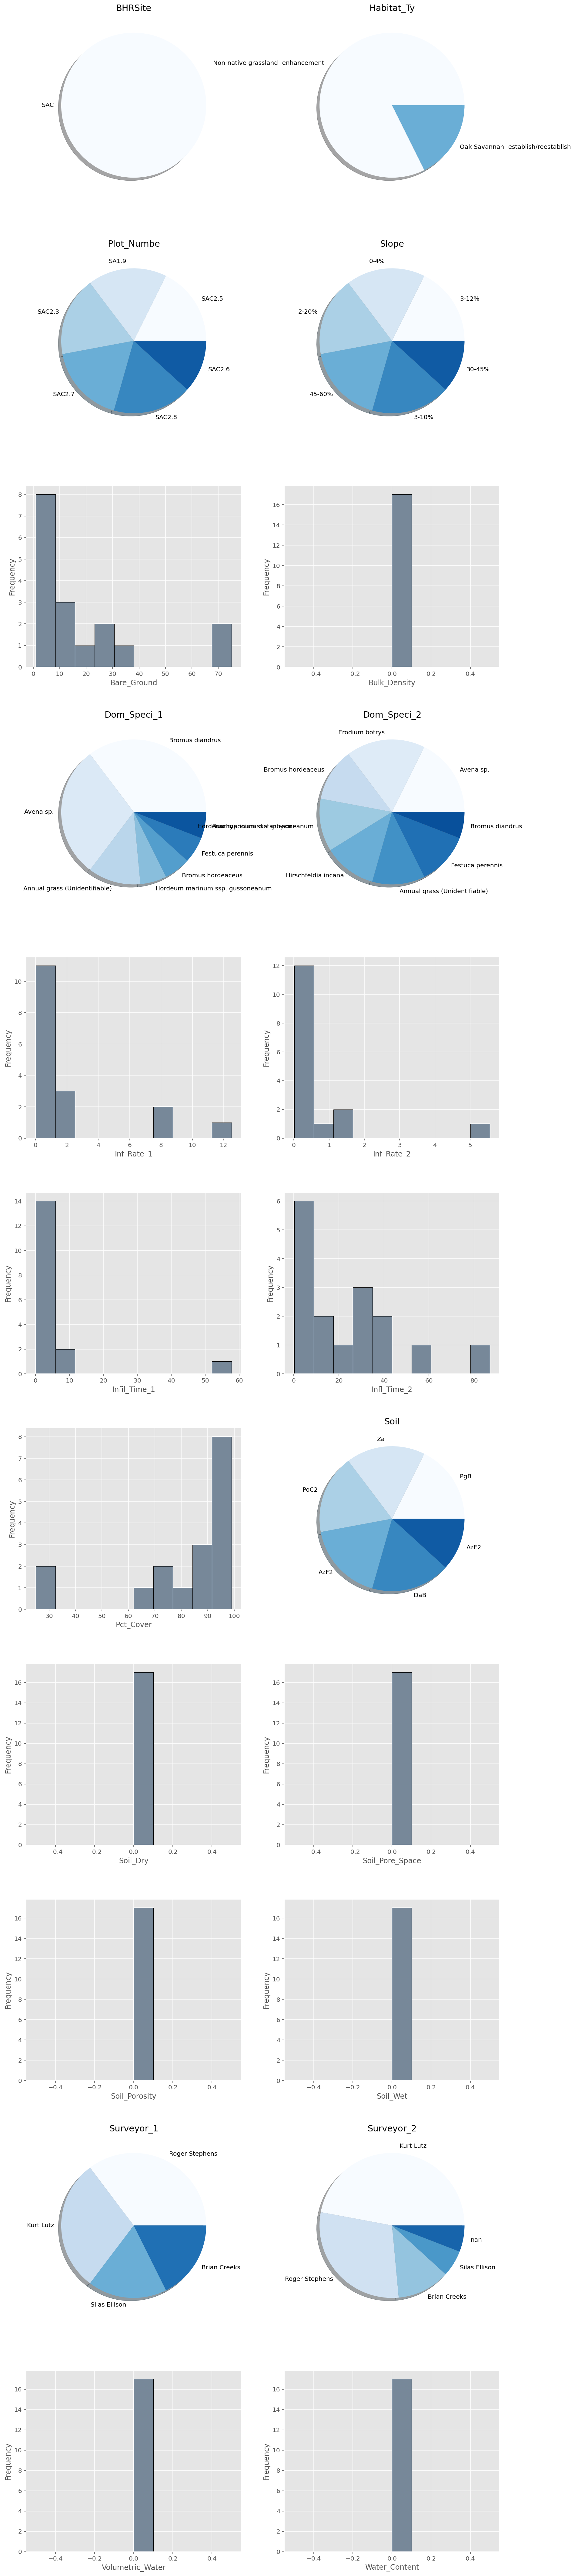

In [58]:
QAQC_plot(sub,['BHRSite', 'Habitat_Ty', 'Plot_Numbe', 'Slope',
       'Bare_Ground', 'Bulk_Density', 'Dom_Speci_1', 'Dom_Speci_2',
        'Inf_Rate_1', 'Inf_Rate_2', 'Infil_Time_1', 'Infl_Time_2',
        'Pct_Cover', 'Soil', 'Soil_Dry', 'Soil_Pore_Space',
       'Soil_Porosity', 'Soil_Wet', 'Surveyor_1', 'Surveyor_2',
       'Volumetric_Water', 'Water_Content'])

AttributeError: 'float' object has no attribute 'dtype'

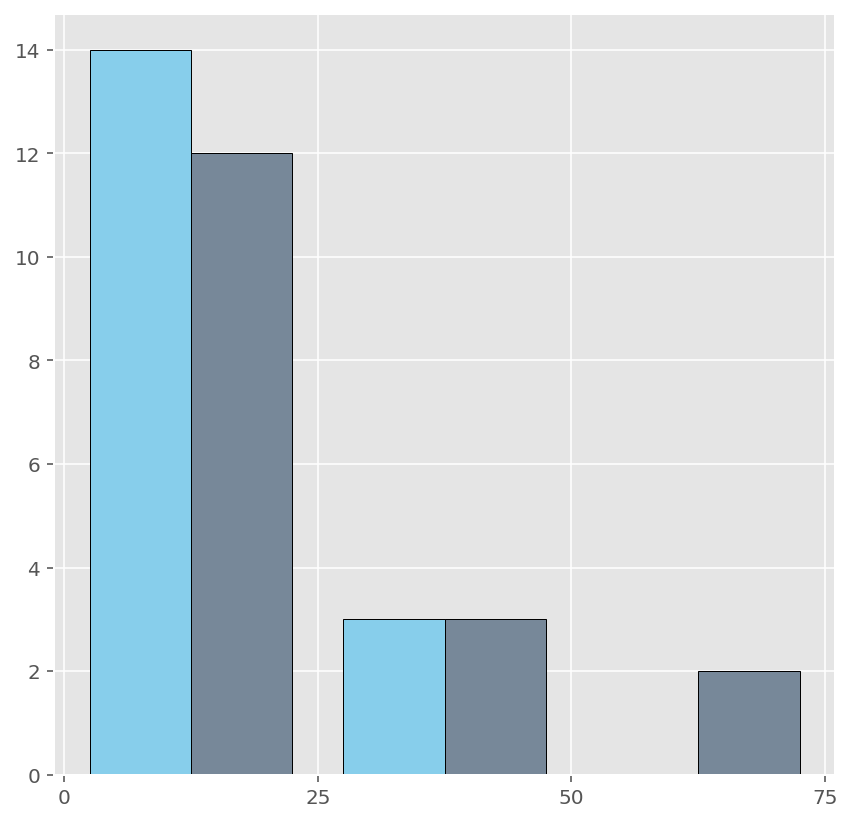

In [59]:
data['Bare_Ground'] = pd.to_numeric(data['Bare_Ground']).astype('Float64')
compare_years_continuous(data,'Bare_Ground','2019','2020',25)

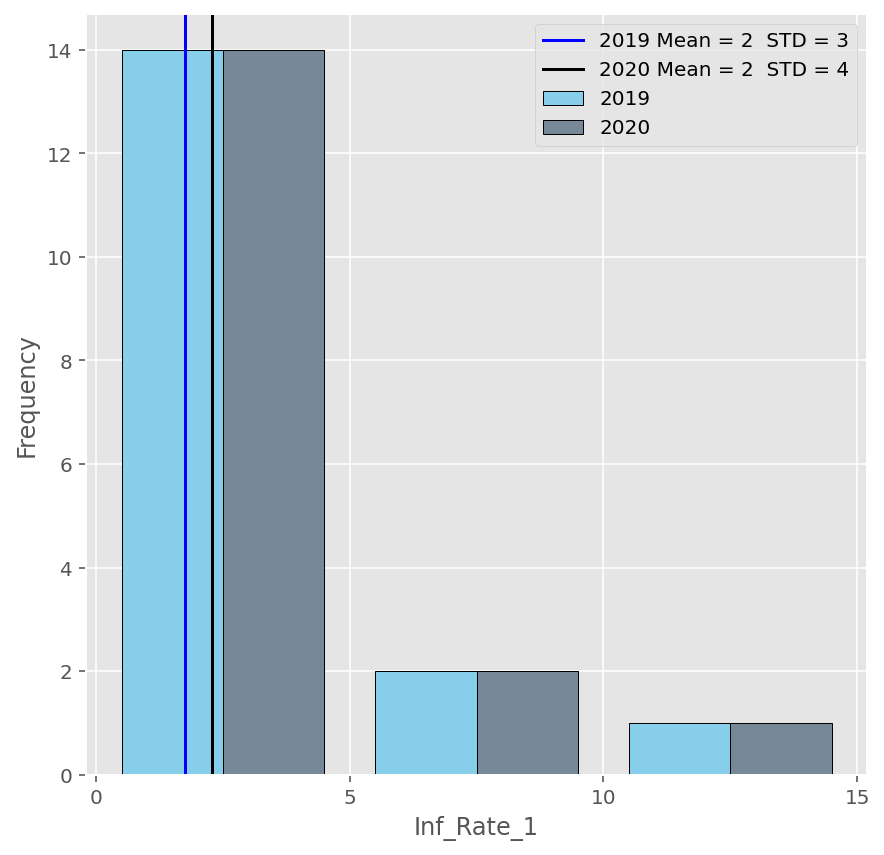

In [60]:
compare_years_continuous(data,'Inf_Rate_1','2019','2020', 5)

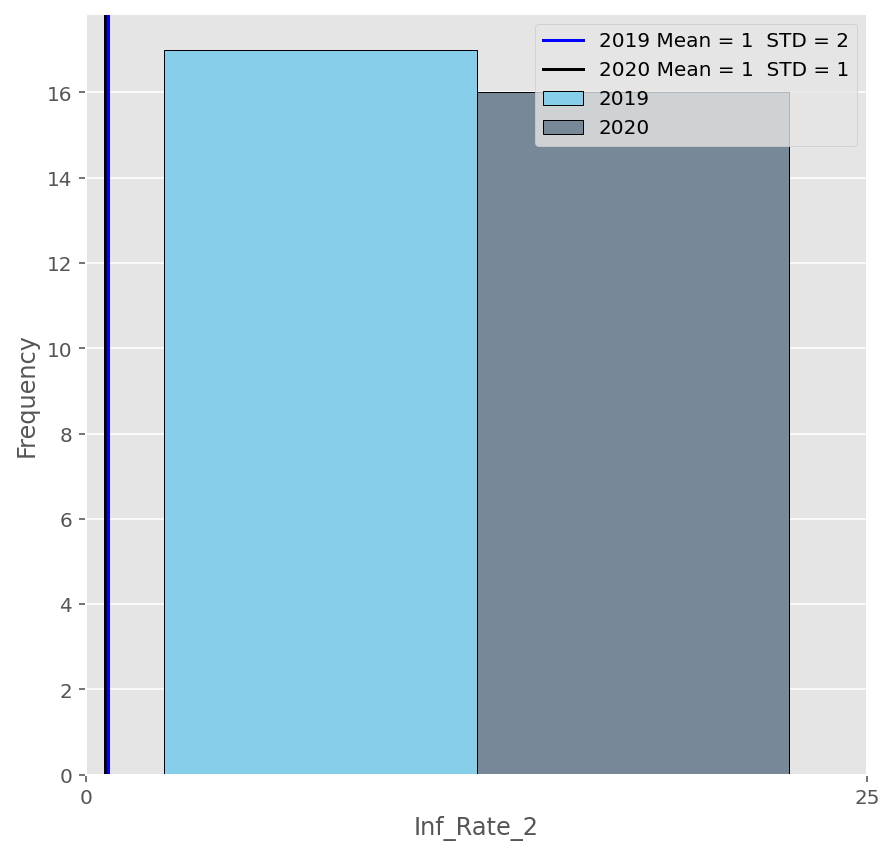

In [61]:
compare_years_continuous(data,'Inf_Rate_2','2019','2020', 25)

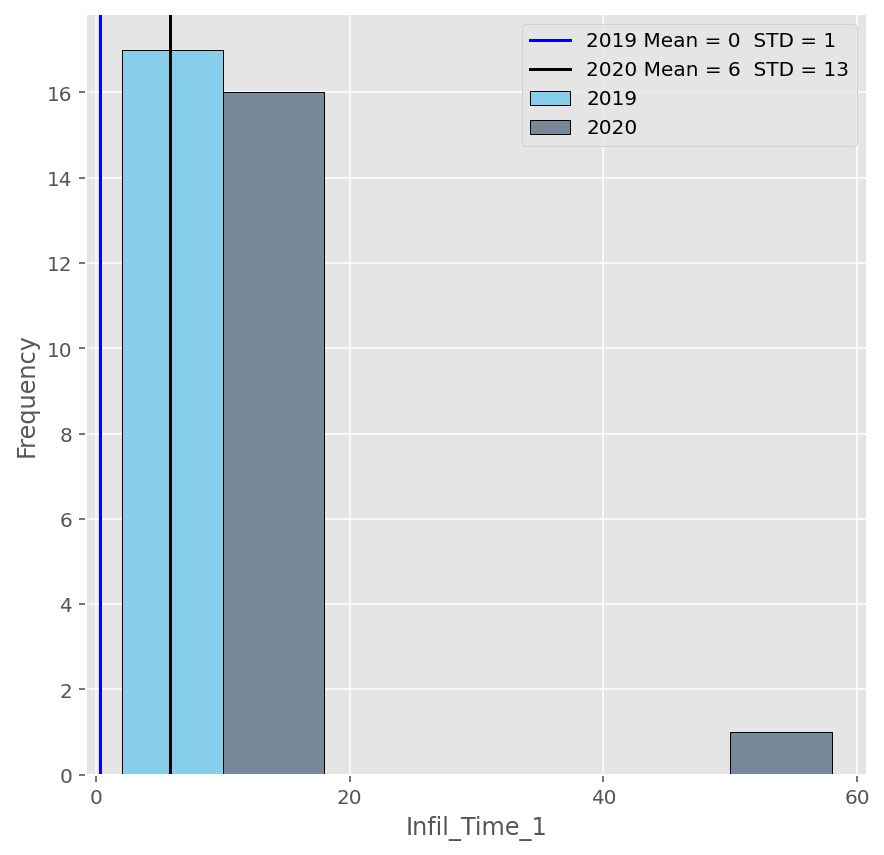

In [62]:
compare_years_continuous(data,'Infil_Time_1','2019','2020', 20)

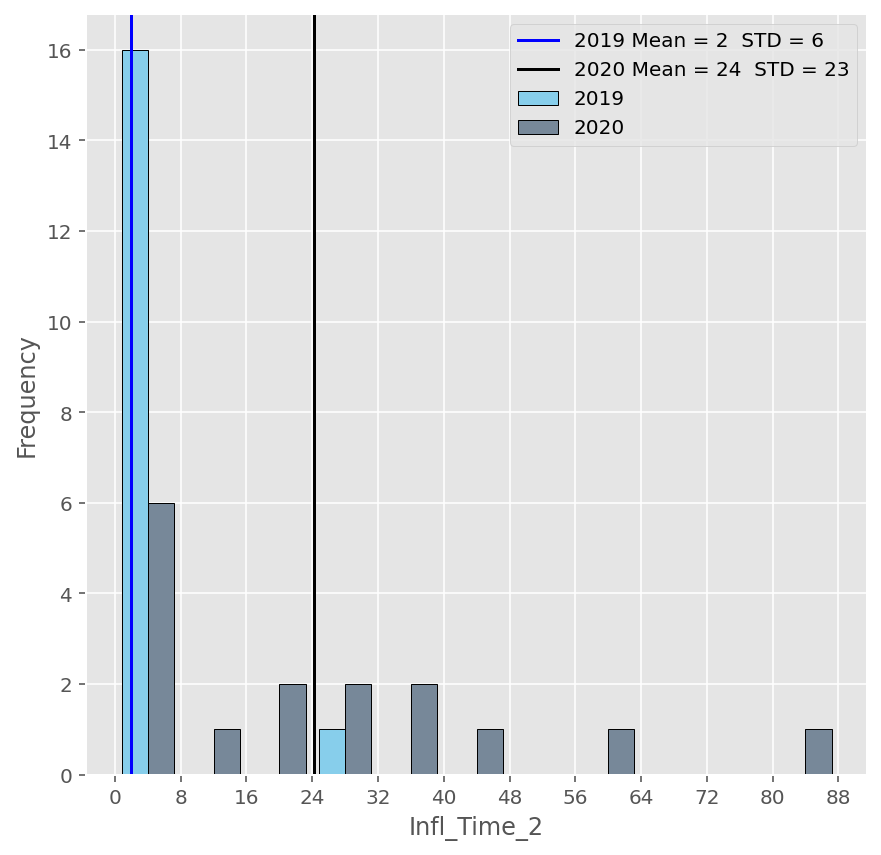

In [63]:
compare_years_continuous(data,'Infl_Time_2','2019','2020', 8)

AttributeError: 'float' object has no attribute 'dtype'

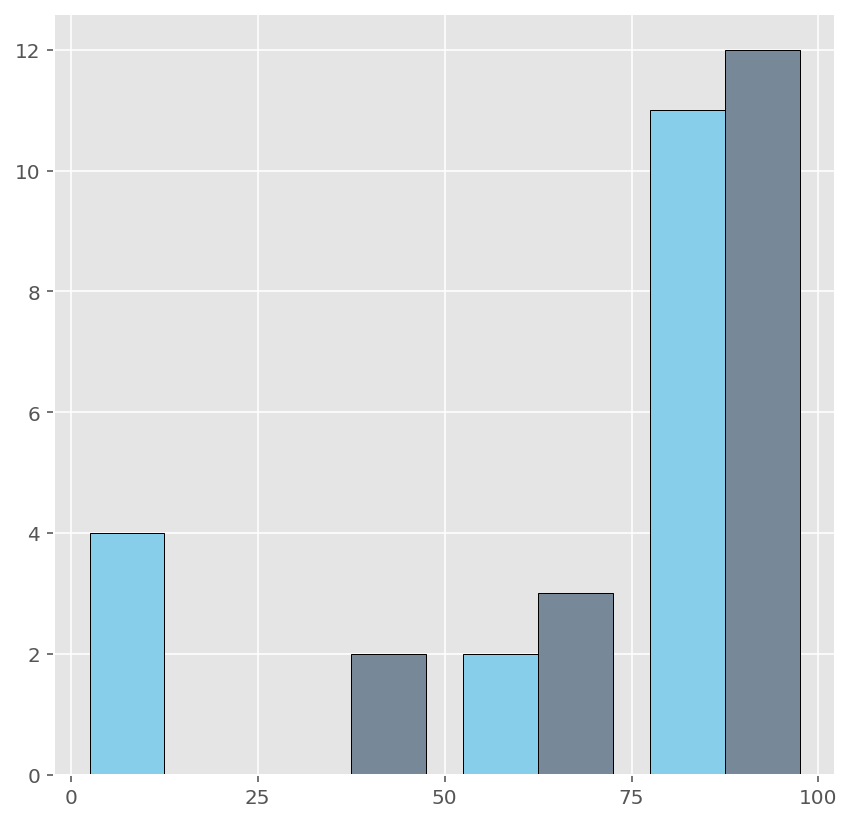

In [64]:
data['Pct_Cover'] = pd.to_numeric(data['Pct_Cover']).astype('Float64')
compare_years_continuous(data,'Pct_Cover','2019','2020', 25)

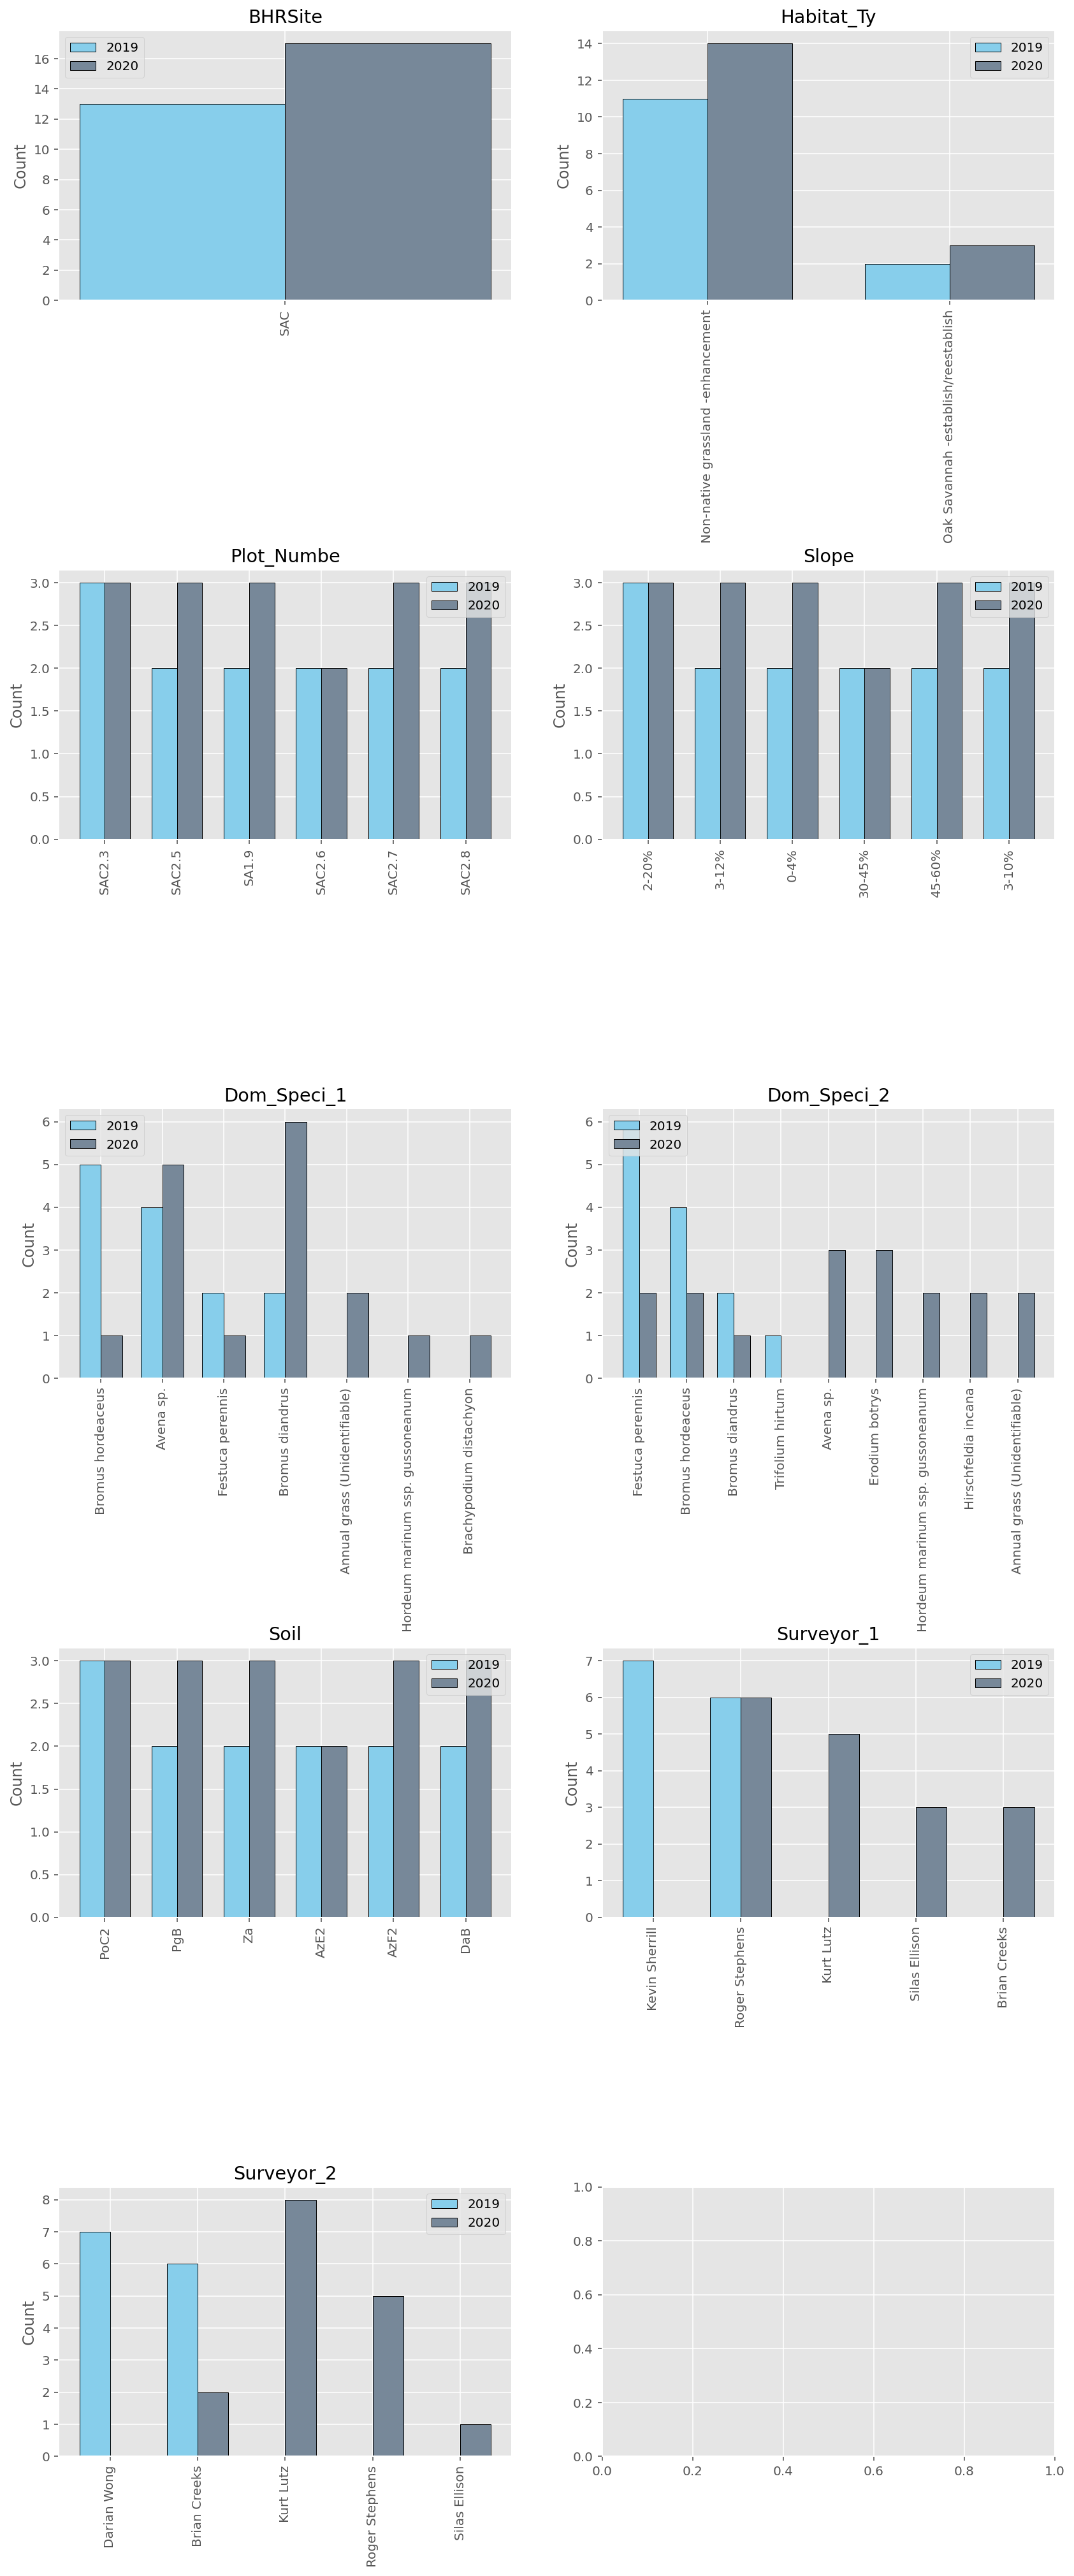

In [65]:
compare_years_catagorical(data,['BHRSite', 'Habitat_Ty', 'Plot_Numbe', 'Slope',
        'Dom_Speci_1', 'Dom_Speci_2','Soil', 'Surveyor_1', 'Surveyor_2', ] ,'2019','2020')

In [66]:
QAQC_attachment_filenames(feature_service)


No attachments for layer/table Stations



No mislabeled photos found for layer/table Observations


In [67]:
# Task Specific Soil Type QAQC

# Creates a copy of current data frame with a new column that bases values off of the string in the "Plot_numbe" column
results = data.copy()


# Converts plot number strings to their corresponding correct soil type

results['plotsoil']=results.Plot_Numbe



        #Replace light/moderate/heavy with numbers, and store into results dataframe
results['plotsoil'] = results.loc[:,'plotsoil'].replace({'SA1.9':'Za','SAC2.3':'PoC2', 'SAC2.5':'PgB','SAC2.6':'AzE2','SAC2.7':'AzF2','SAC2.8':'DaB'})

#3) Compare that column to the string in "soil" column
comparison = (results.loc[results.Soil!=results.plotsoil,:])

if not comparison.empty:
    print ("Mismatch in soil types!")
    display (comparison)
else:
    print ("No mismatches in soil types.")

No mismatches in soil types.


# Export data deliverable

In [6]:
data.columns

Index(['Plot_Numbe', 'Habitat_Ty', 'Slope', 'BHRSite', 'SHAPE', 'OBJECTID',
       'Surveyor_1', 'Surveyor_2', 'Dom_Speci_1', 'Dom_Speci_2', 'Comments',
       'GlobalID', 'Inf_Rate_1', 'Pct_Cover', 'Bare_Ground', 'Bulk_Density',
       'Inf_Rate_2', 'Soil', 'Water_Content', 'Soil_Porosity',
       'Soil_Pore_Space', 'Volumetric_Water', 'Soil_Wet', 'Soil_Dry',
       'Infil_Time_1', 'Infl_Time_2', 'Observation_Date'],
      dtype='object')

In [7]:
data = data.rename(columns={'OBJECTID':'Object ID','GlobalID':'Global ID'})

In [8]:
field_order = [
    'BHRSite',
    'Observation_Date',
    'Surveyor_1',
    'Surveyor_2',
    'Habitat_Ty',
    'Plot_Numbe',
    'Slope',
    'Dom_Speci_1',
    'Dom_Speci_2',
    'Pct_Cover',
    'Bare_Ground',
    'Bulk_Density',
    'Soil',
    'Water_Content',
    'Soil_Porosity',
    'Soil_Pore_Space',
    'Volumetric_Water',
    'Soil_Wet',
    'Soil_Dry',
    'Infil_Time_1',
    'Infl_Time_2',
    'Inf_Rate_1',
    'Inf_Rate_2',
    'Comments',
    'Object ID',
    'Global ID',
    'SHAPE'
]

In [9]:
export_data_deliverable(data, feature_service, field_order, file_name='Upland_Hydrology_Assessment')

Exported to Outputs/Upland_Hydrology_Assessment_Data_20211028.xlsx
